![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/named_entity_recognition_(NER)/NER_aspect_airline_ATIS.ipynb)


Named entities are phrases that contain the names of persons, organizations, locations, times and quantities. Example:
<br>
<br>

#Content
ATIS dataset provides large number of messages and their associated intents that can be used in training a classifier. Within a chatbot, intent refers to the goal the customer has in mind when typing in a question or comment. While entity refers to the modifier the customer uses to describe their issue, the intent is what they really mean. For example, a user says, ‘I need new shoes.’ The intent behind the message is to browse the footwear on offer. Understanding the intent of the customer is key to implementing a successful chatbot experience for end-user.
https://www.kaggle.com/hassanamin/atis-airlinetravelinformationsystem
<br>
<br>

|Tags predicted by this model | 	
|------|
 | O|
 | I-depart_time.end_time|
 | B-arrive_date.date_relative|
 | I-fromloc.state_name|
 | B-depart_date.date_relative|
 | B-fromloc.state_code|
 | B-meal_description|
 | B-depart_time.time_relative|
 | I-fare_amount|
 | I-fromloc.city_name|
 | B-booking_class|
 | I-arrive_time.end_time|
 | B-return_date.today_relative|
 | B-fromloc.state_name|
 | B-round_trip|
 | B-depart_date.today_relative|
 | I-return_date.day_number|
 | I-depart_time.start_time|
 | B-period_of_day|
 | B-arrive_date.day_number|
 | B-flight_stop|
 | B-depart_date.day_name|
 | I-stoploc.city_name|
 | I-return_date.today_relative|
 | B-class_type|
 | B-stoploc.state_code|
 | B-economy|
 | B-depart_time.end_time|
 | B-return_date.date_relative|
 | I-fromloc.airport_name|
 | B-arrive_date.month_name|
 | I-flight_mod|
 | B-toloc.airport_code|
 | I-depart_time.end_time|
 | B-airline_code|
 | B-flight_mod|
 | B-cost_relative|
 | B-state_name|
 | B-fromloc.city_name|
 | B-depart_time.period_of_day|
 | I-city_name|
 | B-depart_time.period_mod|
 | B-city_name|
 | B-meal|
 | B-return_date.day_number|
 | I-airline_name|
 | I-restriction_code|
 | B-airline_name|
 | B-restriction_code|
 | B-flight|
 | B-transport_type|
 | B-time_relative|
 | B-arrive_time.time_relative|
 | B-fromloc.airport_code|
 | B-time|
 | I-toloc.city_name|
 | B-toloc.state_name|
 | B-meal_code|
 | I-arrive_date.day_number|
 | B-depart_time.start_time|
 | B-month_name|
 | B-fromloc.airport_name|
 | B-flight_number|
 | B-days_code|
 | I-meal_description|
 | B-fare_basis_code|
 | I-cost_relative|
 | I-time|
 | B-return_time.period_of_day|
 | I-depart_time.time|
 | B-depart_date.day_number|
 | I-economy|
 | B-arrive_time.start_time|
 | B-return_date.day_name|
 | B-return_time.period_mod|
 | B-airport_code|
 | B-stoploc.airport_code|
 | B-flight_time|
 | I-transport_type|
 | B-depart_date.month_name|
 | I-toloc.airport_name|
 | B-today_relative|
 | I-arrive_time.period_of_day|
 | B-day_name|
 | B-toloc.city_name|
 | B-connect|
 | I-round_trip|
 | B-depart_time.time|
 | B-airport_name|
 | B-arrive_time.period_of_day|
 | B-stoploc.airport_name|
 | I-class_type|
 | B-aircraft_code|
 | I-return_date.date_relative|
 | B-toloc.country_name|
 | I-flight_number|
 | B-state_code|
 | B-or|
 | I-depart_date.today_relative|
 | B-toloc.airport_name|
 | I-arrive_time.time|
 | I-flight_time|
 | I-state_name|
 | I-airport_name|
 | I-depart_time.period_of_day|
 | B-arrive_time.time|
 | B-depart_date.year|
 | I-flight_stop|
 | I-toloc.state_name|
 | B-arrive_date.day_name|
 | B-compartment|
 | I-depart_date.day_number|
 | I-meal_code|
 | B-arrive_time.end_time|
 | I-today_relative|
 | I-arrive_time.start_time|
 | B-toloc.state_code|
 | B-day_number|
 | I-arrive_time.time_relative|
 | I-fare_basis_code|
 | I-depart_time.time_relative|
 | B-return_date.month_name|
 | B-stoploc.city_name|
 | B-arrive_time.period_mod|
 | B-fare_amount|
 | B-mod|
 | B-arrive_date.today_relative|













In [1]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
!pip install nlu==1.1.1.rc1  pyspark==2.4.7 > /dev/null
! wget http://ckl-it.de/wp-content/uploads/2021/01/atis_intents.csv

--2021-02-02 13:11:15--  http://ckl-it.de/wp-content/uploads/2021/01/atis_intents.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391936 (383K) [text/csv]
Saving to: ‘atis_intents.csv’

atis_intents.csv    100%[===================>] 382.75K  --.-KB/s    in 0.1s    

2021-02-02 13:11:15 (3.87 MB/s) - ‘atis_intents.csv’ saved [391936/391936]



# NLU makes NER easy. 

You just need to load the NER model via ner.load() and predict on some dataset.    
It could be a pandas dataframe with a column named text or just an array of strings.

In [2]:
import nlu 
import pandas as pd

df = pd.read_csv("atis_intents.csv")
df.columns = ["flight","text"]
ner_df = nlu.load('en.ner.aspect.airline',).predict(df["text"],output_level='chunk')
ner_df

nerdl_atis_840b_300d download started this may take some time.
Approximate size to download 14.5 MB
[OK!]
glove_840B_300 download started this may take some time.
Approximate size to download 2.3 GB
[OK!]


,entities,word_embeddings,ner_confidence,entities_confidence
origin_index,,,,
0,pittsburgh,"[[-0.038548000156879425, 0.5425199866294861, -...","[1.0, 0.9998999834060669, 1.0, 1.0, 1.0, 1.0, ...",fromloc.city_name
0,baltimore,"[[-0.038548000156879425, 0.5425199866294861, -...","[1.0, 0.9998999834060669, 1.0, 1.0, 1.0, 1.0, ...",toloc.city_name
0,thursday,"[[-0.038548000156879425, 0.5425199866294861, -...","[1.0, 0.9998999834060669, 1.0, 1.0, 1.0, 1.0, ...",depart_date.day_name
0,morning,"[[-0.038548000156879425, 0.5425199866294861, -...","[1.0, 0.9998999834060669, 1.0, 1.0, 1.0, 1.0, ...",depart_time.period_of_day
1,arrival time,"[[-0.038548000156879425, 0.5425199866294861, -...","[1.0, 1.0, 0.9991999864578247, 0.8240000009536...",flight_time
...,...,...,...,...
4975,san francisco,"[[-0.13562999665737152, 0.3321700096130371, -0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9998000264167...",toloc.city_name
4975,denver,"[[-0.13562999665737152, 0.3321700096130371, -0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9998000264167...",stoploc.city_name
4976,delta,"[[-0.08496099710464478, 0.5019999742507935, 0....","[1.0, 0.9998999834060669, 1.0, 1.0, 1.0, 1.0, ...",airline_name


## Lets explore our data which the predicted NER tags and visalize them!    

We specify [1:] so we dont see the count for the O-tag wich is the most common, since most words in a sentence are not named entities and thus not part of a chunk

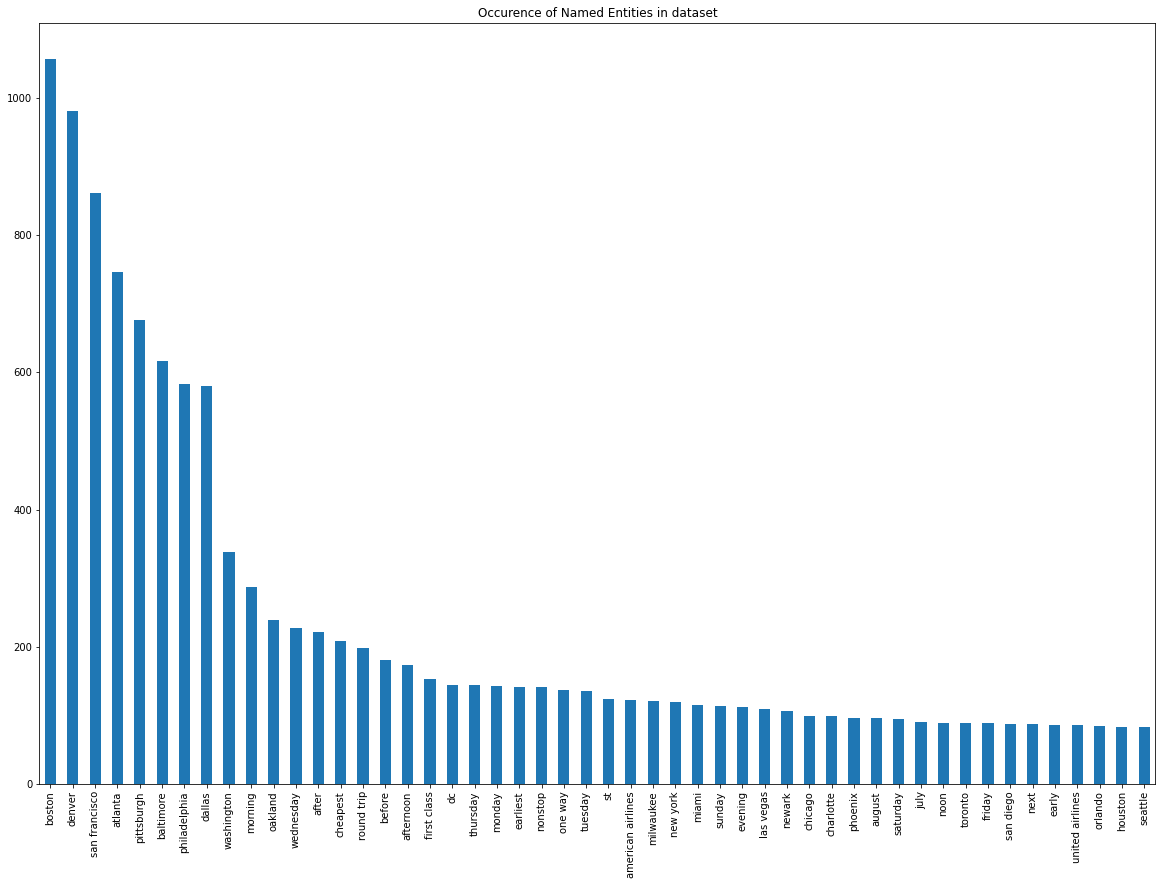

In [3]:
ner_df['entities'].value_counts()[0:50].plot.bar(title='Occurence of Named Entities in dataset', figsize=(20,14))

## Most occurding `fromloc.city_name` tagged entities

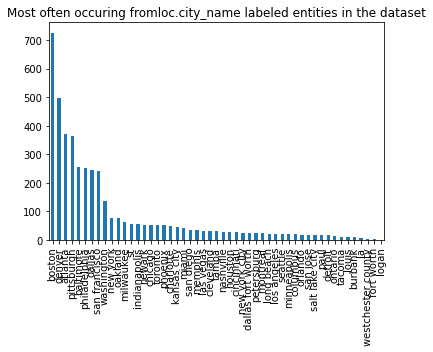

In [4]:
ner_type_to_viz = 'fromloc.city_name'
ner_df[ner_df.entities_confidence == ner_type_to_viz]['entities'].value_counts().plot.bar(title='Most often occuring fromloc.city_name labeled entities in the dataset')

## Most occurding `flight_time` tagged entities

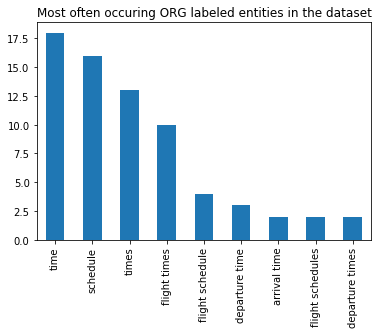

In [5]:
ner_type_to_viz = 'flight_time'
ner_df[ner_df.entities_confidence == ner_type_to_viz]['entities'].value_counts().plot.bar(title='Most often occuring ORG labeled entities in the dataset')